<h1><u><b>CS-165 Coursework</b></u></h1>
<p>Student Number (2215810)</p>

<h2><b>Contents</b></h2>
<ul>
    <li><b>Introduction</b></li>
    <li><b>Dataset Analysis</b></li>
    <li><b>Chosen Model</b></li>
    <li><b>Results Analysis</b></li>
    <li><b>Conclusion</b></li>
    <li><b>References</b></li>
</ul>

<h2><b>Introduction</b></h2>

<b>Main Objective</b>
<p>The main objective of this notebook is to explore and provide a solution to determining whether there is a forest fire within a region in Algeria.</p>

<b>Problem Overview</b>
<p>Algeria is a Mediterranean country that is among the most vunerable to forest fire problems, with 1600 fire starts in the Algeria Forest recorded over the period 1980 to 2015 [1]. Forest fires can cause both economic and ecological damage [1], making it essential to put measures in place to be able to prevent these disasters.</p>


<p>Annual losses due to the damage caused by results of forest fires in Algeria are around 1.5 billion dinar (DA) or $11 million US dollars [3]. Furthermore, the compensation paid to victims of forest fires reached 600 million DA or $4.4 million US dollars in 2020 [3]. This economy behind forest fire management is unsustainable, and with an estimated 10 million people living below the poverty line in February 2023 in Algeria [4], the money used to pay for damages would be better suited elsewhere.</p>

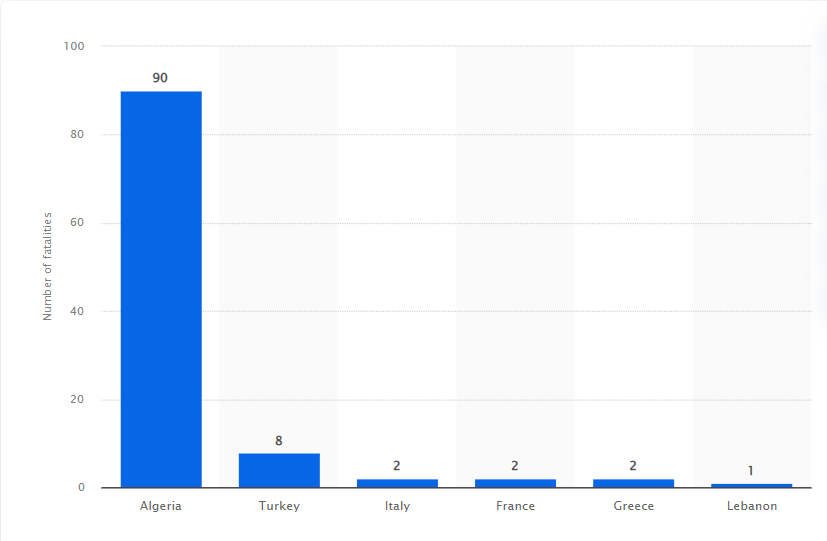
<p>Figure 1: Number of fatalities due to wildfires in the Mediterranean as of August 18, 2021, by country [7]

As well as damaging the economy and surrounding environment, forest fires also pose a huge threat to the local population of Algeria. As figure 1 shows, out of all countries in the Mediterranean, forest fires have caused the most fatalities in Algeria, with 86% of the recorded fatalities.

This is a huge problem, as it is likely many of these fatalities would have been avoided if a forest fire could have been anticipated and supressed before any major damage was done.</p>

The global average increase in temperature rate, since 1981, has been around 0.18*C per decade [6]. There is a direct correlation with global warming and forest fire risk, with regions in Algeria experiencing a higher risk of fire during a dry year [2]. This shows that the number of forest fires in Algeria is likely to increase as Earth heats up, making it more relevant than ever to introduce a solution to the problem.  

<b>Proposed Solution</b>
<p>I believe that the best solution for this problem would be to create a predictive model, that would output whether a fire would occur / not occur for some given inputs. To create this solution I will use the PPDAC model, as to find out what factors influence forest fires, I will require a structured approach for the investgative research to be carried out on the provided dataset.

Steps:</p>
<ul>
    <li>Problem: Will there be a forest fire in a certain region in Algeria based on some input?</li>
    <li>Plan: 
        <ul>
            <li>The solution to the problem can be evauluated by testing predictions against the actual recorded values</li>
            <li>I am using a dataset including observations and results about forest fires over 2 regions in Algeria</li>
            <li>A legal implication of this project is that the solution could output a false positive / negative in a real world scenario. This may negatively impact the resources being used to manage forest fires, to which the model could be held accountable.</li>
        </ul>
    </li>
    <li>Data:
        <ul>
            <li>The data has already been collected</li>
            <li>Samples with missing values have already been removed</li>
            <li>Data has already been formatted into a tabular representation.</li>
            <li>The dataset used is free to use, provided I reference the creators.</li>
        </ul>
    </li>
    <li>Analysis:
        <ul>
            <li>Compare differences in number of recorded forest fires between regions</li>
            <li>Visualise relationships between features</li>
            <li>Find most important features</li>
            <li>Create multiple predictive models</li>
            <li>Evaluate models and choose most accurate</li>
        </ul>
    </li>
    <li>Conclusion:
        <ul>
            <li>Can the chosen model predict if there will be a forest fire in a region in Algeria?</li>
            <li>What are the key features that are used when predicting a target output?</li>
            <li>Does the model have good accuracy?</li>
            <li>What could be done differently to achieve a better accuracy?</li>
        </ul>
    </li>
</ul>

<h2><b>Dataset analysis</b></h2>

<b>Dataset Description</b>
<p>The dataset used in this notebook is a recording of forest fires across a 3 month period in Northern Algeria [5].

The dataset is a tabular structure and includes 243 instances that cover forest fires across two regions of Algeria over the period of June 2012 to September 2012. As all samples have been taken in 2012 a year feature is not recorded. Each instance has 11 features and 1 target output which is either "fire" or "notfire". Features are seperated by commas. 

The forest fires dataset is split into 2 sections - the Bejaia region data and the Sidi Bel-abbes region data. Each region starts on the 1st of June and ends on the 30th September. The data for the Bejaia region is made up of 122 samples and the data for the Sidi Bel-abbes region is made up of 121 samples.

This datasets features are split into 4 main categories (in order):
<ul>
    <li>Date information: 
        <ul>
            <li>Day</li>
            <li>Month</li>
        </ul>
    </li>
    <li>Weather information: 
        <ul>
            <li>Temperature</li>
            <li>Relative humidity</li>
            <li>Wind speed</li>
            <li>Rain</li>
        </ul>
    </li>
    <li>Forest fire weather index: 
        <ul>
            <li>Fine fuel moisture code</li>
            <li>Duff moisture code</li>
            <li>Drought code</li>
            <li>Initial spread index</li>
            <li>Buildup index</li>
            <li>Fire weather index</li>
        </ul>
    </li>
    <li>Class of the sample (fire / notfire)</li>
</ul>

Types of measurements for features in the dataset vary, for example wind speed is measured in km/h whereas temperature is measured in Celsius degrees. Furthermore, as different measurements are being used, the scales of features differ. For example Fire weather index can be measured at values from 0 to 31.1 whereas Fine fuel moisture code can be measured at values from 28.6 to 92.5.

Weather information features and forest fire weather index features are used in the FWI System:</br>
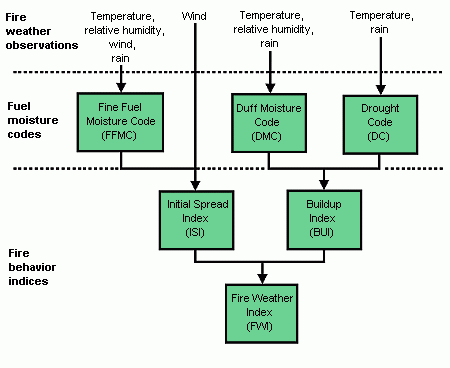

Forest fire weather index feature definitions:
<ul>
    <li>Fine fuel moisture code: numeric rating of moisture content of litter and other cured fine fuels.</li>
    <li>Duff moisture code: numeric rating of the average moisture content of loosely compacted organic layers of moderate depth.</li>
    <li>Drought code: numeric rating of the average moisture content of deep, compact organic layers.</li>
    <li>Initial spread index: numeric rating of the expected rate of fire spread.</li>
    <li>Buildup index: numeric rating of the total amount of fuel available for combustion.</li>
    <li>Fire weather index: numeric rating of fire intensity.</li>
</ul>

Higher values in the forest fire weather index features indicate an increase of fire possibilty.
</p>

<b>Libary Imports</b>

In [298]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance

<b>Preprocessing</b>
<p>We can first read our dataset into a dataframe, with columns chosen from the keys of the dataset description.</p>

In [299]:
# loads the forest fire dataset into a pandas dataframe
forest_fire_df = pd.read_csv("ForestFire.csv", names=["Day", "Month", "Temp", "RH", "WS", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI", "Target"])

# changes fire to 1 and notfire to 0 within dataframe
forest_fire_df["Target"].replace(["fire", "notfire"], [1,0], inplace=True)

We can then split the dataset to get 2 dataframes, 1 for the features and 1 for the target outputs.

In [300]:
# splits dataset into separate dataframes containing features / class
feature_frame = forest_fire_df.drop(["Target"], axis=1)
label_frame = forest_fire_df["Target"]

As we are going to investigate how the target output of the dataset responds differently to feature inputs depending on which region is being used, I have split the dataset into a Bejaia dataframe and a Sidi Bel-abbes dataframe (sidi).

In [301]:
instances_per_region = (len(forest_fire_df) // 2) + 1 # due to an observation being removed

# splits feature and label frame into 2 separate variables, for each region
bejaia_feature_frame = feature_frame[:instances_per_region]
bejaia_label_frame = label_frame[:instances_per_region]

sidi_feature_frame = feature_frame[instances_per_region:]
sidi_label_frame = label_frame[instances_per_region:]

<b>Region comparison</b>
<p>As can be seen from the graph below, our dataset is very unbalanced. Sidi Bel-abbes has many more recorded forest fires than Bejaia over the recorded 3 month period. Therefore, it is important to process these 2 regions separately.</p>

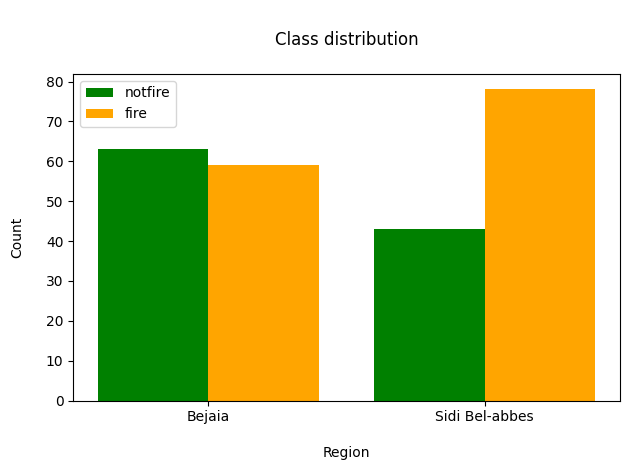

In [302]:
x = [1, 2]
# plots 2 bars, showing the number of instances of fire or not fire
plt.bar([i-0.2 for i in x], [bejaia_label_frame.value_counts()[0], sidi_label_frame.value_counts()[0]], width=0.4, color="green")
plt.bar([i+0.2 for i in x], [bejaia_label_frame.value_counts()[1], sidi_label_frame.value_counts()[1]], width=0.4, color="orange")

# adds labels to plot
plt.title("\nClass distribution\n")
plt.xticks(x, ["Bejaia", "Sidi Bel-abbes"])
plt.xlabel("\nRegion")
plt.ylabel("Count\n")
plt.legend(["notfire", "fire"])
plt.tight_layout()

<b>Dataset relationships</b>

In [303]:
# generates different colours for a label frame
def generate_colours(labels):
    colours = []
    
    # iterates over label frame
    for label in labels:
        # assigns different colour for fire / notfire
        if label == 1:
            colours.append("orange")
        elif label == 0:
            colours.append("green")
    return colours

As can be seen below, there exists a number of combinations of features that show a linear relationship with forest fire outcomes.

Text(0.5, 0.98, '\nForest fire dataset feature relationships\n')

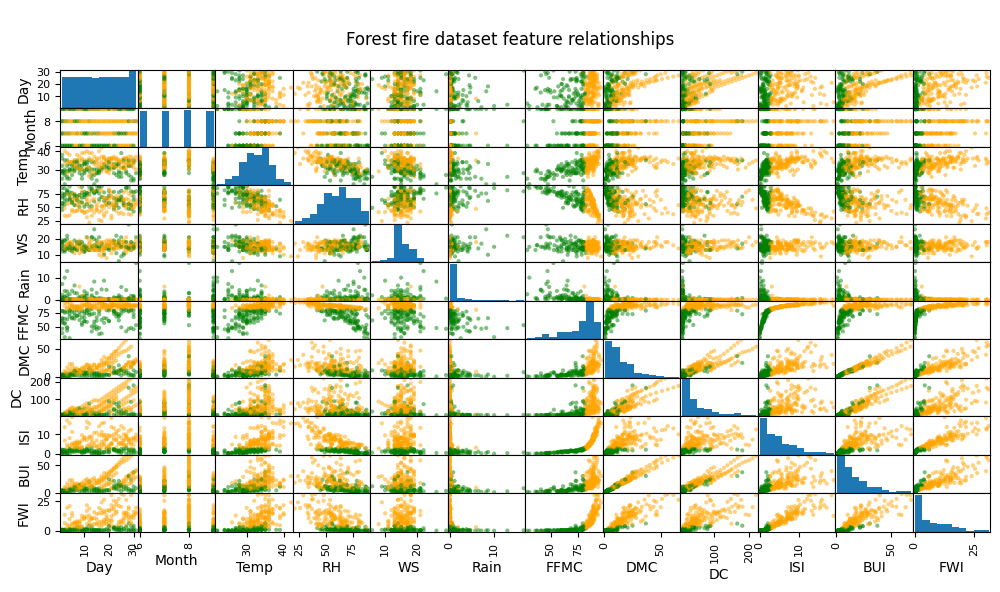

In [304]:
# plots a scatter matrix
pd.plotting.scatter_matrix(feature_frame, c=generate_colours(label_frame), figsize=(12, 6))
plt.suptitle("\nForest fire dataset feature relationships\n")

To explore these relationships further, we can use 'SelectKBest' to find the most relevant features.

In [305]:
# initialises 'SelectKBest' class
best_features = SelectKBest()

# fits dataset to class
fit = best_features.fit(forest_fire_df.drop(["Target"], axis=1), forest_fire_df["Target"])

We can then use the scores for each feature to output a table ranking them, best to worst.

In [306]:
# assigns scores and labels to a dataframe
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(forest_fire_df.drop(["Target"], axis=1).columns)

# creates table of results
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns = ["Features", "Score"]
features_scores.sort_values(by="Score", ascending=False)

,Features,Score
6,FFMC,349.857732
9,ISI,283.500483
11,FWI,258.245816
10,BUI,126.459769
7,DMC,125.816095
2,Temp,87.459585
8,DC,85.225437
3,RH,55.346541
5,Rain,40.448238
0,Day,10.341215


From the result of the table above it can be seen FFMC (Fine Fuel Moisture Code), ISI (Initial Spread Index) and FWI (Fire Weather Index) are the 3 most relevant features in the dataset that affect a forest fire.

In [307]:
important_features = ["FFMC", "ISI", "FWI"]

To understand the relationships between these variables and the outputs of the associated observations, we can produce histograms showing the number of counts of fire / not fire for each value. 

In [308]:
# finds number of fire / notfire classes per bin as well as bins
def find_bins(feature_frame, label_frame):
    # initialises empty arrays
    fire_count = [0,0,0,0,0,0,0,0,0,0]
    notfire_count = [0,0,0,0,0,0,0,0,0,0]

    # seperates feature frame into 10 equally distanced bins
    bins = pd.cut(feature_frame, bins=10)
    bins = bins.sort_values().unique()

    count = 0
    features_checked = 0

    # iterates over each feature in dataframe
    for feature in feature_frame:
        # iterates over each bin
        for bin in bins:
            
            # checks to see if feature value is within bounds of current bin
            if bin.left < feature and feature < bin.right:
                # checks to see if label associated with feature was fire / notfire
                if label_frame.values[features_checked] == 1:
                    fire_count[count] += 1
                else:
                    notfire_count[count] += 1
            count += 1
        
        features_checked += 1
        count = 0
        
    intervals = [round(bin.left) for bin in bins]
    # accomodates for cut method not having to create new bins if equal classes can be split into 9
    if len(intervals) < 10:
        intervals.append(round(bins[-1].left))
        
    return [fire_count, notfire_count, intervals]


In [309]:
# plots histogram with custom bins
def create_histogram(axis, feature_frame, label_frame, region):
    fire_count, notfire_count, bins = find_bins(feature_frame, label_frame)

    # plots bars for fire / notfire counts
    X_axis = np.arange(10)
    axis.bar(X_axis-0.2, notfire_count, 0.4, label="notfire", color="green")
    axis.bar(X_axis+0.2, fire_count, 0.4, label="fire", color="orange")

    # adds labels to plot
    axis.set_xticks(X_axis, bins)
    axis.set_xlabel(feature_frame.name)
    axis.set_ylabel("Count")
    axis.set_title(region)
    axis.legend()

The histogram for FFMC shows a relationship between FFMC and a fire output where 78 < FFMC for both regions. For the Sidi Bel-abbes region, the maximum FFMC value is higher than the Bejaia region.

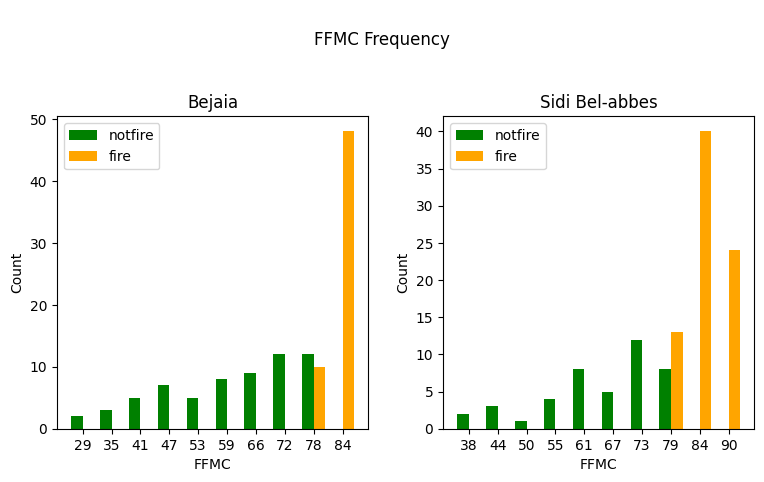

In [310]:
# defines figure layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))

# creates histograms on axis
create_histogram(ax1, bejaia_feature_frame["FFMC"], bejaia_label_frame, "Bejaia")
create_histogram(ax2, sidi_feature_frame["FFMC"], sidi_label_frame, "Sidi Bel-abbes")

# adds labels to plot
plt.suptitle("\nFFMC Frequency")
plt.tight_layout(pad=2)


The histogram for ISI shows a relationship between ISI and a fire output where 1 < ISI for both regions. Similar to FFMC, the Sidi Bel-abbes region has a higher maximum ISI value than the Bejaia region.

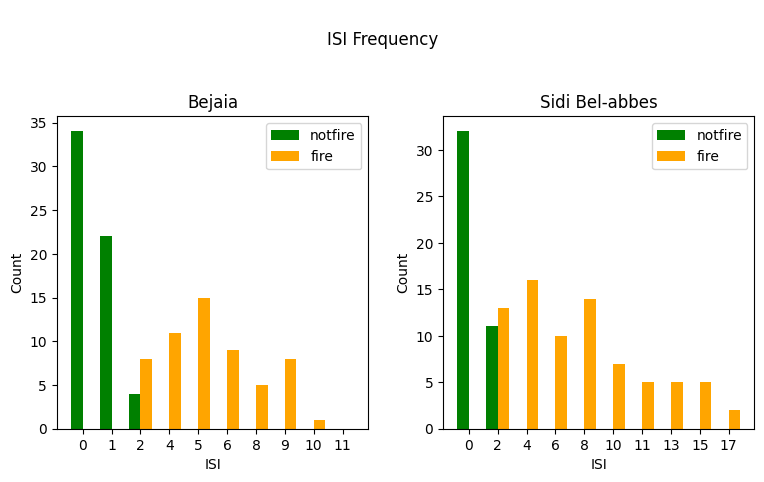

In [311]:
# defines figure layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))

# creates histograms on axis
create_histogram(ax1, bejaia_feature_frame["ISI"], bejaia_label_frame, "Bejaia")
create_histogram(ax2, sidi_feature_frame["ISI"], sidi_label_frame, "Sidi Bel-abbes")

# adds labels to plot
plt.suptitle("\nISI Frequency")
plt.tight_layout(pad=2)

The histogram for FWI shows a high count for the notfire class at lower values across both regions. Similar to the other 2 variables above, the Sidi Bel-abbes region has a higher maximum FWI value is higher than the Bejaia region.

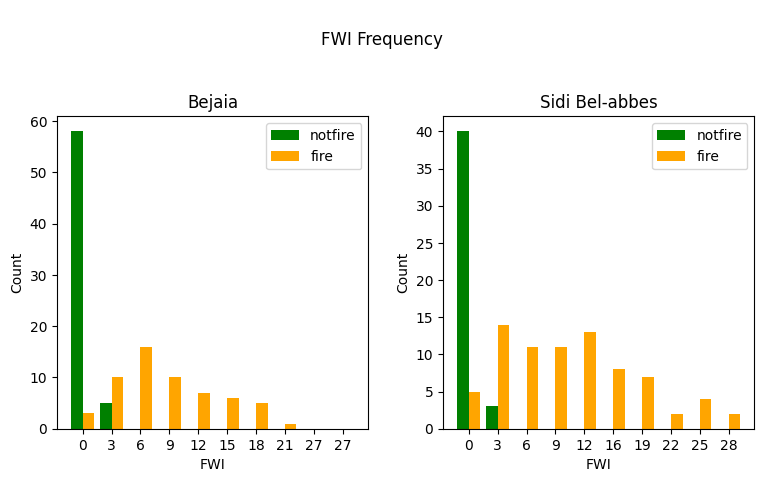

In [312]:
# defines figure layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))

# creates histograms on axis
create_histogram(ax1, bejaia_feature_frame["FWI"], bejaia_label_frame, "Bejaia")
create_histogram(ax2, sidi_feature_frame["FWI"], sidi_label_frame, "Sidi Bel-abbes")

# adds labels to plot
plt.suptitle("\nFWI Frequency")
plt.tight_layout(pad=2)

<b>Feature scale comparison</b>
<p>From the above histograms, it is clear that there is a linear relationship between the values of the chosen features and class outputs. However, none of the features above follow a gaussian distribution and are operating on different scales (as shown below). Therefore, it will be neccesary to normalise the dataset when creating the predictive model.</p>

Text(0.5, 1.0, '\nForest fire dataset feature scales\n')

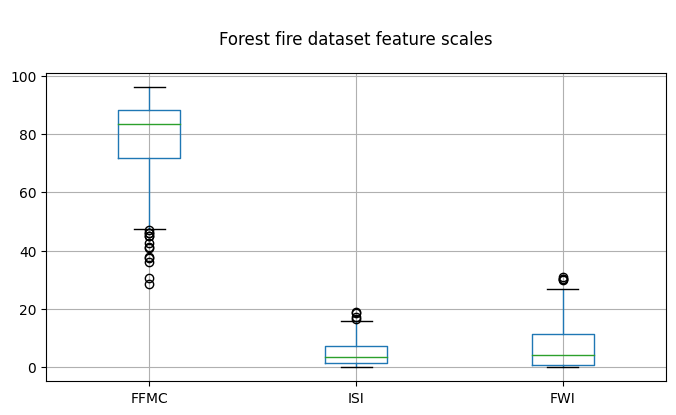

In [313]:
# displays boxplot of chosen features
fig = plt.figure(figsize=(8, 4))
pd.plotting.boxplot(feature_frame[important_features])
plt.title("\nForest fire dataset feature scales\n")

<h2><b>Chosen model</b></h2>

<b>Model Choice</b>
<p>To be able to determine if there is a forest fire within a certain region of Algeria, we must first have some prior knowledge on what inputs affect whether there will be a fire / not fire. Therefore the solution to this problem will make use of a supervised learning algorithm - trained by the forest fires dataset.

To be able to inform users about whether there will be a fire in a certain region, we must be able to classify these fire / not fire instances. Therefore, our model will work using a classification process. The outcome of the model will be binary, either fire (1) or notfire (0).

As our model will be based on classification, I have chosen to select 2 types of algorithm - a Decision Tree Classifier and a Logitstic Regressor. These models will be tested and compared, from which the most accurate model will be chosen.

<i>Decision Tree Classifier:</i>

A decision tree classifier is made up of a hierarchical tree structure, which has a root node, branches, internal nodes and leaf nodes. The algorithm employs a divide and conquer strategy by using a greedy search to identify the optimal split points in a tree. This process is carried out in a recursive manner until all records have been classified with specific labels.

I have chosen the decision tree classifier algorithm as it is extremely good at breaking down complex data into manageable parts. Futhermore, the results of decision trees are very easy to interpret which will help in understanding the main reasons why the model has predicted that a forest fire occurs / doesn't occur.

<i>Logistic Regressor:</i>

A logistic regression classifier uses an algorithm to find the relationsips between 2 data factors. It uses this relationsip to predict the value of a factor based on the other. The model I will create will use a binary logistic regression algorithm, which means the output can only have 2 values (fire / notfire).

Decision trees disect a dataset into smaller regions whereas the logistic regression algorithm fits a single line to divide a dataset into 2, where either side of the line is a target class. If the datasets classes are not well separated, decision trees are susceptible to overfitting the training data, but logistic regression generalizes better. Therefore, I have chosen the logitstic regression algorithm to compare against the accuracy of the decision tree model, and determine if a decision tree is being overfitted.
</p>

<b>Model Implementation</b>
<p>I have chosen to implement both of my chosen algorithms by first creating a general use class for a classification model. This class will create different models based on the region entered as well as the type of model entered. The class provides an easy implemenation of both models, where the region and type of model can be saved for ease of visualising comparisons. This class contains all methods required to train and test either of the chosen algorithms.</p>

In [314]:
# class which constructs a container for a particular classification algorithm
class Model:
    
    def __init__(self, model, type, region):
        # assigns model to class
        self.model = model
         # assigns basic information to the class
        self.type = type
        self.region = region
        
        # checks to see what dataset should be used
        if region == "Bejaia":
            self.feature_frame = bejaia_feature_frame
            self.label_frame = bejaia_label_frame
            
        elif region == "Sidi Bel-abbes":
            self.feature_frame = sidi_feature_frame
            self.label_frame = sidi_label_frame
        
        # selects important features defined in analysis
        self.feature_frame = self.feature_frame[important_features]
        # normalise data as these important features are on different scales
        self.normalised_feature_frame = ((self.feature_frame - self.feature_frame.min()) / (self.feature_frame.max() - self.feature_frame.min()))
        
        # splits data and trains the model
        self.split_data()
        self.train_model()
    
    
    # splits the data into training / testing sets
    def split_data(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.normalised_feature_frame, self.label_frame, test_size=0.2)
        
    # fits the data to the chosen model
    def train_model(self):
        self.model.fit(self.X_train, self.y_train)
        
    # returns an array of predictions based on input values
    def predict(self, array):
        array = array[important_features]
        normalised_observations = (array - array.min()) / (array.max() - array.min())
        
        return self.model.predict(normalised_observations)

<b>Model hyperparameter tuning</b>
<p>Before testing the performance of each model, it would be beneficial to fit the most optimal parameters to each model, in order to be able to evaluate the models with the best possible results. Therefore, I have developed functions that will cross validate the performance of a passed model.</p>

In [315]:
# returns statistics about how well a model has performed
def test_model(model):
    # instantiate class to shuffle data
    kFold = KFold(n_splits=5, shuffle=True)
    
    # gets performance scores for model
    scoring = ["accuracy", "precision_macro", "recall_macro", "roc_auc"]
    scores = cross_validate(model.model, model.X_train, model.y_train, scoring=scoring, cv=kFold)

    # seperates results
    model_fit_time = scores["fit_time"].mean()
    model_score_time = scores["score_time"].mean()
    model_accuracy = scores["test_accuracy"].mean()
    model_precision = scores["test_precision_macro"].mean()
    model_recall = scores["test_recall_macro"].mean()
    model_auc = scores["test_roc_auc"].mean()
    sum_scores = model_fit_time + model_score_time + model_accuracy + model_precision + model_recall + model_auc
    
    # packages results into formatted dictionary
    model_data = {"name": f"{model.type} ({model.region})", "fit_time": model_fit_time, "score_time": model_score_time,
                  "accuracy": model_accuracy, "precision": model_precision, "recall": model_recall, "auc": model_auc, 
                  "sum":  sum_scores}
    
    return model_data

In [316]:
# returns total score for a models performance
def get_scores(model_type, parameters):
    score = 0
    
    # checks model type
    if model_type == "DECISION TREE":
        # tests decision tree model
        score = (test_model(Model(DecisionTreeClassifier(**parameters), "DECISION TREE", "Bejaia"))["sum"] +
                 test_model(Model(DecisionTreeClassifier(**parameters), "DECISION TREE", "Sidi Bel-abbes"))["sum"])

    elif model_type == "LOGISTIC REGRESSOR":
        # tests logistic regressor model
        score = (test_model(Model(LogisticRegression(**parameters), "LOGISTIC REGRESSOR", "Bejaia"))["sum"] +
                 test_model(Model(LogisticRegression(**parameters), "LOGISTIC REGRESSOR", "Sidi Bel-abbes"))["sum"])
    
    return score

I have used a grid search for hyperparameter tuning to quickly iterate over possible options, comparing the performance of specific combinations.

In [317]:
# sets defualt tree values
best_tree_parameters = {}
# initialises base score
best_score = get_scores("DECISION TREE", best_tree_parameters)

# loops over combinations of paramaters
for criterion in ["gini", "entropy"]:
    for splitter in ["best", "random"]:
        for max_depth in [2, 4, 8, 16, 32, 64, 128]:
            for max_features in [None, "sqrt", "log2"]:
                for max_leaf_nodes in [2, 4, 8, 16, 32, 64, 128]:
                    
                    # gets score for current combination of paramaters
                    parameters = {"criterion":criterion, "splitter":splitter, "max_depth":max_depth,
                                  "max_features":max_features, "max_leaf_nodes":max_leaf_nodes}
                    score = get_scores("DECISION TREE", parameters)
                    
                    # checks to see if current score beats best score
                    if best_score < score:
                        best_score = score
                        best_tree_parameters = parameters

In [318]:
# sets defualt logistic values
best_logistic_parameters = {}
# initialises base score
best_score = get_scores("LOGISTIC REGRESSOR", best_logistic_parameters)

# loops over combinations of paramaters
for penalty in ["none", "l1", "l2"]:
    for C in [0.2, 0.4, 0.6, 0.8, 1.0]:
        for fit_intercept in [False, True]:
            for max_iter in [100, 200, 400, 800, 1600]:
                for multi_class in ["auto", "ovr", "multinomial"]:
                        
                    # gets score for current combination of paramaters
                    parameters = {"penalty":penalty, "C":C, "fit_intercept":fit_intercept, "max_iter":max_iter, "multi_class":multi_class, 
                                  "solver":"saga"}
                    score = get_scores("LOGISTIC REGRESSOR", parameters)
                    
                    # checks to see if current score beats best score
                    if best_score < score:
                        best_score = score
                        best_logistic_parameters = parameters

I then add the models, with the best performing paramaters, to an array, where they can be used to compare and visualise results.

In [319]:
# creates array of models for testing
models = [
    Model(DecisionTreeClassifier(**best_tree_parameters), "DECISION TREE", "Bejaia"),
    Model(DecisionTreeClassifier(**best_tree_parameters), "DECISION TREE", "Sidi Bel-abbes"),
    
    Model(LogisticRegression(**best_logistic_parameters), "LOGISTIC REGRESSOR", "Bejaia"),
    Model(LogisticRegression(**best_logistic_parameters), "LOGISTIC REGRESSOR", "Sidi Bel-abbes")
]

<b>Model evaluation</b>
<p>I can collect performance scores for each of the saved models to be used in comparisons.</p>

In [320]:
# used to store data about the performance of all models
models_evaluation_data = {"names": [], "fit_times": [], "score_times": [], "accuracy": [], "precision": [], "recall": [], "auc": []}

# loops over models
for model in models:
    scores = test_model(model)
    
    # fills evalution data with statistics about models
    models_evaluation_data["names"].append(scores["name"])
    models_evaluation_data["fit_times"].append(scores["fit_time"])
    models_evaluation_data["score_times"].append(scores["score_time"])
    models_evaluation_data["accuracy"].append(scores["accuracy"])
    models_evaluation_data["precision"].append(scores["precision"])
    models_evaluation_data["recall"].append(scores["recall"])
    models_evaluation_data["auc"].append(scores["auc"])

As can be seen from the table below, it is a tight split between the decision tree models and the logistic regressor models. The accuracy, precision and recall scores are all within 5% of each other between the 2 model types. However, the logistic regressor models have consistently produced higher AUC scores and the decision tree models have consistently produced smaller fitting and scoring times.

In [321]:
# creates dataframe to visualise table
models_results = pd.DataFrame({
    "Model": models_evaluation_data["names"],
    "Fitting time": models_evaluation_data["fit_times"],
    "Scoring time": models_evaluation_data["score_times"],
    "Accuracy": models_evaluation_data["accuracy"],
    "Precision": models_evaluation_data["precision"],
    "Recall": models_evaluation_data["recall"],
    "AUC": models_evaluation_data["auc"]
}, columns = ["Model", "Fitting time", "Scoring time", "Accuracy", "Precision", "Recall", "AUC"])

# sorts values with best at top of table
models_results.sort_values(by="Accuracy", ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,AUC
1,DECISION TREE (Sidi Bel-abbes),0.002708,0.005627,0.979474,0.975641,0.979048,0.979048
2,LOGISTIC REGRESSOR (Bejaia),0.009111,0.006679,0.968421,0.970556,0.966389,0.995505
3,LOGISTIC REGRESSOR (Sidi Bel-abbes),0.008609,0.007301,0.957895,0.966667,0.957500,1.000000
0,DECISION TREE (Bejaia),0.003159,0.007962,0.928421,0.929394,0.931414,0.931414


<b>Final model</b>
<p>Due to the closeness in performance between the decision tree classifier models and the logistic regressor models, I have decided to select the decision tree classifier as my final model. I have chosen to do this as the benefit of being able to visualise how a prediction has been decided will be extremely useful in future understanding of when a forest fire is likely to occur. This will make it easier to monitor specific features of the dataset, that have been the most important in the outcome of the decision tree model. 

The below models are now trained on their specific regions in Northern Algeria, and can be used to predict whether a fire will occur based on new data.</p>

In [322]:
# final models
chosen_bejaia_model = models[0]
chosen_sidi_model = models[1]

We can now define a function that can take in a set of values, and output a prediction, independent to each region.

In [323]:
# returns df visualising predictions
def predict_fire(region, observations):
    predictions = []
    
    # checks to see which model should be used to predict values
    if region == "Bejaia":
        predictions = chosen_bejaia_model.predict(observations)
    
    elif region == "Sidi Bel-abbes":
        predictions = chosen_sidi_model.predict(observations)
           
    return observations.assign(Prediction=["fire" if x == 1 else "notfire" for x in predictions])

This function is my final proposed solution to the problem. It can be used to predict fires against new data for either the Bejaia region or the Sidi Bel-abbes in Algeria.

In [324]:
predict_fire("Bejaia", bejaia_feature_frame.sample(5))

,Day,Month,Temp,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Prediction
10,11,6,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,fire
70,10,8,35,55,14,0.0,88.9,18.6,67.0,7.4,21.9,11.6,fire
19,20,6,30,80,16,0.4,59.8,3.4,27.1,0.9,5.1,0.4,notfire
106,15,9,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0,notfire
83,23,8,36,53,16,0.0,89.5,37.6,161.5,10.4,47.5,22.3,fire


<h2><b>Results analysis</b></h2>

<b>Comparison choices</b>
<p>In order to effectively compare the results of both types of models, I have chosen to use the following methods of comparison:</p>
<ul>
    <li>Feature Importance - Will be used to determine which of the selected features, fed into the different models, was most important when making a prediction.</li>
    <li>Confusion Matrix - Will be used to visualise the true / false negative and positive rate for the tested data set.</li>
    <li>Receiver Operating Characteristic Curve - Will be used to visualise the performance of the models at different thresholds.</li>
    <li>Decision Trees - Will be used to view the paths that have been created, in order to arrive at fire / notfire class outcome.</li>
</ul>

<b>Feature Importance</b>

In [325]:
# visuaises which features were most important during training
def create_bar_graph(model, axis):
    # gets most important features for model
    mean_importance = [x for x in permutation_importance(model.model, model.X_train, model.y_train)["importances_mean"]]
    axis.bar(important_features, mean_importance)
    
    # labels for plot
    axis.set_title(f"{model.region} Dataset\n({model.type})")
    axis.set(xlabel="Features\n", ylabel="Importance Factor")

As can be seen from the graph below, the decision tree model's most important features tend to completely differ, whereas the logistic regressor models share some common features. The Bejaia decision tree tends to utilise FWI more, and the Sidi Bel-abbes decision tree utilises FFMC more. The Bejaia logitsic regressor's most important feature is ISI, and the Sidi Bel-abbes logistic regressor's most important features scores are more evenly spread out between FFMC, ISI and FWI. There is a clear difference between the way the decision tree and logistic regression models rank the features, with ISI not being of the greatest importance for the decision tree classifiers, but commonly ranked highly for the logistic regressors.

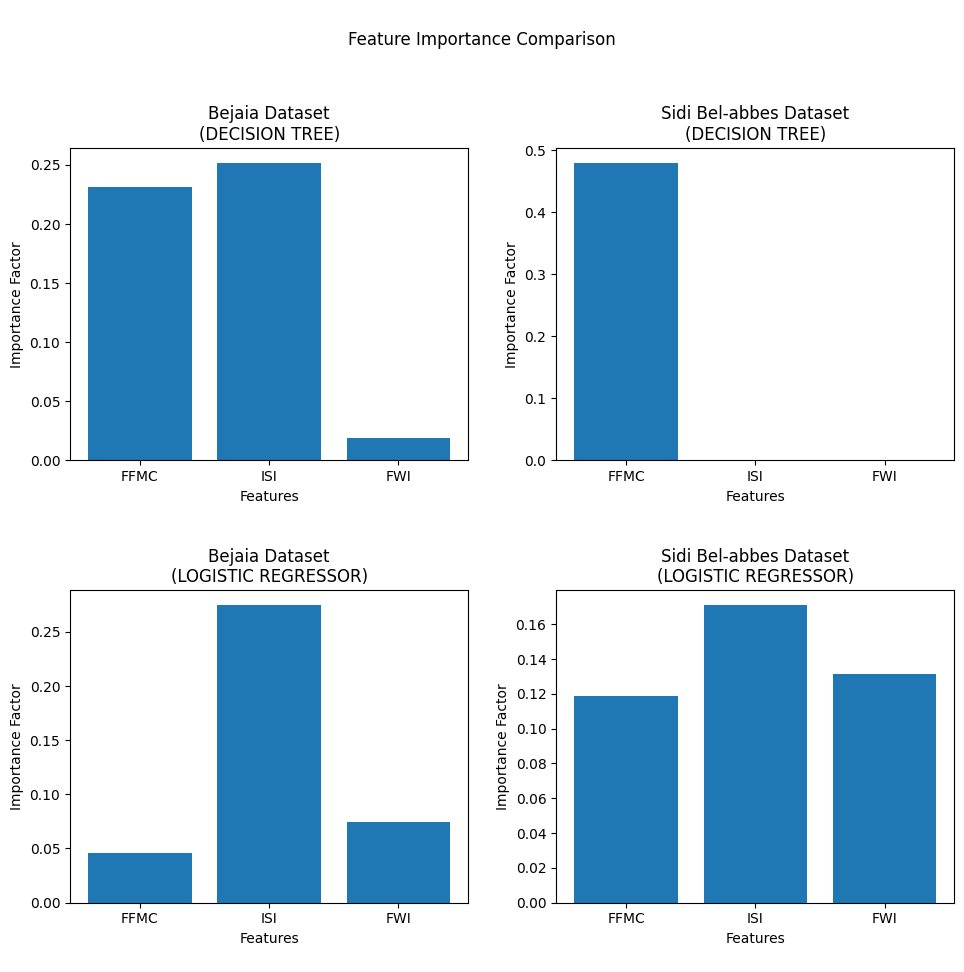

In [326]:
# initialises figure layout
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
col = 0
row = 0

# loops over each model 
for model in models:
    # creates graph for particular model
    create_bar_graph(model, ax[row][col])

    # column is reset if it reaches end of row
    if col == 1:
        col = 0
        row += 1
    else:
        col+=1

# adds labels to plot
plt.suptitle("\nFeature Importance Comparison\n")
plt.tight_layout(pad=2)

<b>Confusion Matrix</b>

In [327]:
# creates plot showing model accuracy for predictions
def create_confusion_matrix(model, axis):
    # plots comparison betwen testing dataset and predictions
    cm = confusion_matrix(model.y_test, model.predict(model.X_test))
    ConfusionMatrixDisplay(cm).plot(ax=axis)
    
    # adds labels to plot
    axis.set_title(f"\n\n{model.region} Dataset\n{model.type} ({round(accuracy_score(model.y_test, model.predict(model.X_test)) * 100, 2)}% accurate)")
    axis.set(xlabel="Predicted Label\n", ylabel="True Label")

The results shown below differ from the cross validation evaluation tests completed earlier. Both types of model show a decrease in their accuracy to the evaluation tests. The decision tree models, on average, show a higher accuracy than the logistic regressor models, which is also opposite to the evaluation tests. This could mean that the models have been overfitted and therefore cannot generalize as well. 

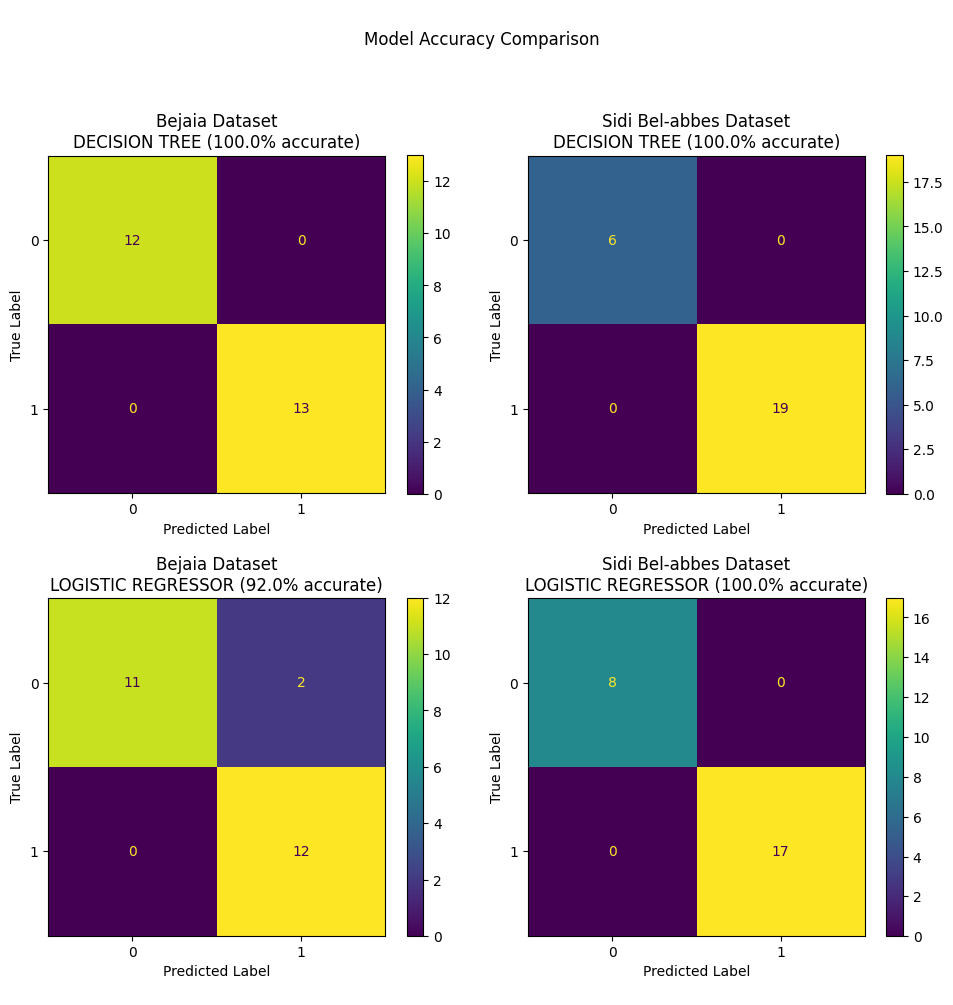

In [328]:
# initialises figure layout
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
col = 0
row = 0

# loops over each model 
for model in models:
    # creates graph for particular model
    create_confusion_matrix(model, ax[row][col])

    # column is reset if it reaches end of row
    if col == 1:
        col = 0
        row += 1
    else:
        col+=1

# adds labels to plot
plt.suptitle("\nModel Accuracy Comparison\n")
plt.tight_layout(pad=2)

<b>Receiver Operating Characteristics</b>

In [329]:
# creates plot visualising model performance
def create_roc_curve(model):
    # analyses models predictions compared to actual values
    predictions = model.model.predict_proba(model.X_test)[:,1]
    # false positive rate / true positive rate
    fpr, tpr, _ = roc_curve(model.y_test, predictions)
    # area under curve
    auc = round(roc_auc_score(model.y_test, predictions) * 100, 2)
    
    # plots values
    plt.plot(fpr * 100, tpr * 100)
    return f"{model.type} ({model.region}), AUC = {str(auc)}%"

The graph below shows perfect performance at all classifcation thresholds for the logistic regressor models. The decision tree models also perform well, with AUC at 90% < for both models.

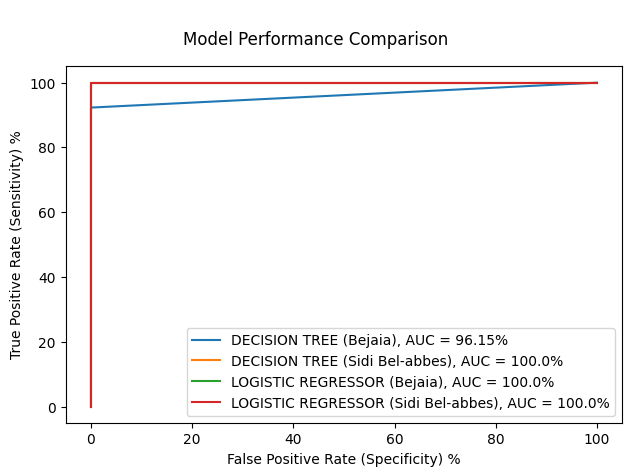

In [330]:
# array which will contain auc score for each model
labels = []
# loops over each model
for model in models:
    labels.append(create_roc_curve(model))

# adds labels to plot
plt.suptitle("\nModel Performance Comparison")
plt.legend(labels)
plt.xlabel("False Positive Rate (Specificity) %")
plt.ylabel("True Positive Rate (Sensitivity) %")
plt.tight_layout(pad=1)

<b>Decision Trees</b>

In [333]:
# visualises decision tree for model
def create_decision_tree(model, axis):
    plot_tree(model.model, feature_names=important_features, class_names=["fire", "notfire"], ax=axis, filled=True)
    # labels model being used
    axis.set_title(f"{model.region} Model\n")

As can be seen below the Bajaia model has a far more complex tree than the Sidi Bel-abbes model. I believe this is due to the data associated with the Sidi Bel-abbes region containing more instances of the fire class. This has provided more data for when a forest fire has occured, therefore, more concise relationsips between the data can be concluded. I believe that if new observations with the class of fire were added to the Bejaia region dataset, so that fire classes were of equal value between the regions, the trees would be of similar complexity.

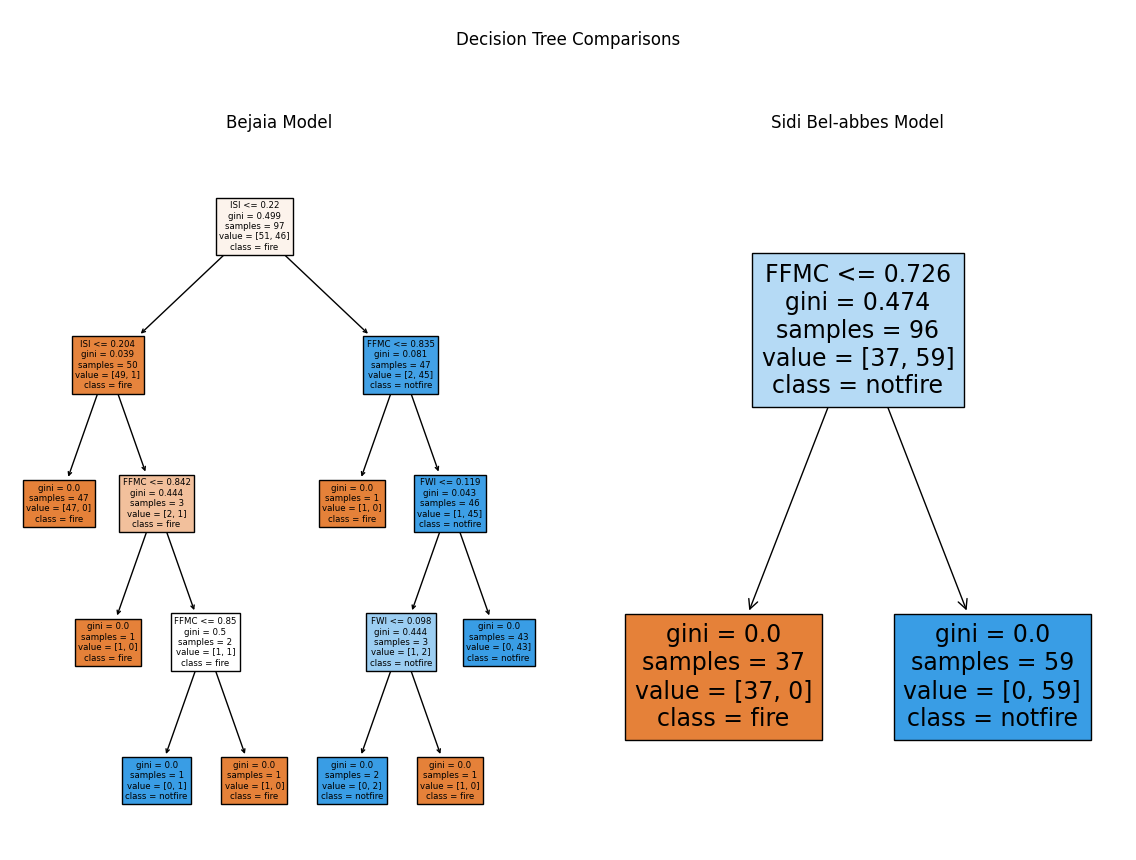

In [335]:
# initialises figure layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 9))

# creates decision tree for each model
create_decision_tree(chosen_bejaia_model, ax1)
create_decision_tree(chosen_sidi_model, ax2)
    
# adds labels to plot
plt.suptitle("\nDecision Tree Comparisons")
plt.tight_layout(pad=3)

<h2><b>Conclusion</b></h2>

My proposed solution allows inputs for a choice of region in Algeria and a dataframe of observations that subsequently are outputted as either "fire" or "notfire". The accuracy of my chosen models are high, 95% <, but there were still false negatives and positives within testing. False negatives would result in a costly use of resources as fire fighters would be sent out to find potentially no fire to supress. False positives would be even more dangerous, as it would mean no support would be prepared for a forest fire. It is unlikely a 100% accurate model in testing would produce 100% accurate results in a real world scenario, however I believe there are ways that I could develop my models in the future. 

The accuracy of these models was greater during model evaluation than in testing, making me believe these models have been overfit and cannot generalize as well. To improve this, I could try test the performance of models with a lower training split, for example a 70% training / 30% testing split.

Furthermore, when using a grid search to tune the hyperparameters of the models, I only used a selection of possible values for some parameters. I could massively inrease the range and selection of values available, as possible parameters, however this would increase the time spent creating models. 

If deployed, this solution would require continuous monitoring as conidtions that affect forest fires will change over time. The solution would also benefit from retraining with a larger dataset, potentially one with data that spans across the whole year for both regions in Algeria instead of just a 3 month period. This may further improve accuracy due to a higher volume of correlations between data being drawn. 

<h2><b>References</b></h2>

<ol>
    <li>Nadjla Bentekhici, Sid-Ahmed Bellal, and Ahmed Zegrar. 2020. Contribution of remote sensing and GIS to mapping the fire risk of Mediterranean forest case of the forest massif of Tlemcen (North-West Algeria). Nat Hazards 104, 1 (October 2020), 811–831. DOI:https://doi.org/10.1007/s11069-020-04191-6</li></br>
    <li>Dalila Kherchouche, Said Slimani, Ramzi Touchan, Djazia Touati, Hamana Malki, and Christopher H. Baisan. 2019. Fire human-climate interaction in Atlas cedar forests of Aurès, Northern Algeria. Dendrochronologia 55, (June 2019), 125–134. DOI:https://doi.org/10.1016/j.dendro.2019.04.005</li></br>
    <li>2021. Sustainable forest management will help Algeria tackle the risk of wildfires. Retrieved April 27, 2023 from https://blogs.worldbank.org/arabvoices/sustainable-forest-management-will-help-algeria-tackle-risk-wildfires</li></br>
    <li>2023. Algeria continues to suffer from poor job creation and increases social spending. Atalayar. Retrieved April 27, 2023 from https://atalayar.com/en/content/algeria-continues-suffer-poor-job-creation-and-increases-social-spending</li></br>
    <li>UCI Machine Learning Repository: Algerian Forest Fires Dataset Data Set. Retrieved April 27, 2023 from https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++</li></br>
    <li>Climate Change: Global Temperature | NOAA Climate.gov. Retrieved April 27, 2023 from http://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature</li></br>
    <li>Mediterranean: wildfire casualties by country 2021 | Statista. Retrieved April 27, 2023 from https://www.statista.com/statistics/1296786/death-toll-due-to-wildfires-in-the-mediterranean/</li><br>
</ol>